In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
height, width = 6, 6


In [3]:
def createRandomMatrix():
    matrix = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
    return matrix

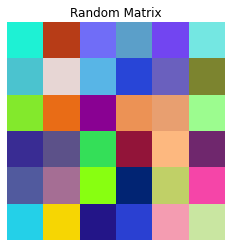

In [4]:
matrix=createRandomMatrix()
plt.title("Random Matrix")
plt.imshow(matrix)
plt.axis('off')
plt.show()


In [5]:
def createBayerFilter():
    bayer_filter = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            if (i % 2 == 0) and (j % 2 == 0):
                bayer_filter[i, j, 1] = 255  # Green
            elif (i % 2 == 0) and (j % 2 == 1):
                bayer_filter[i, j, 0] = 255  # Blue
            elif (i % 2 == 1) and (j % 2 == 0):
                bayer_filter[i, j, 2] = 255  # Red
            else:
                bayer_filter[i, j, 1] = 255  # Green

    return bayer_filter


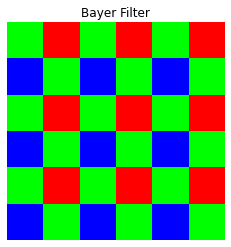

In [6]:
bayerFilter = createBayerFilter()
plt.title("Bayer Filter")
plt.imshow(bayerFilter)
plt.axis('off')
plt.show()

In [7]:

def interpolateBayer(bayer_filter,matrix):
    height, width, _ = bayer_filter.shape
    interpolated_image = matrix

    for i in range(height):
        for j in range(width):
            if bayer_filter[i, j, 1] == 255:  # Green
                interpolated_image[i, j, 1] = 255
                if i > 0:
                    interpolated_image[i, j, 0] = bayer_filter[i-1, j, 0]  # Blue
                    interpolated_image[i, j, 2] = bayer_filter[i-1, j, 2]  # Red
                elif i < height - 1:
                    interpolated_image[i, j, 0] = bayer_filter[i+1, j, 0]  # Blue
                    interpolated_image[i, j, 2] = bayer_filter[i+1, j, 2]  # Red
            elif bayer_filter[i, j, 0] == 255:  # Blue
                interpolated_image[i, j, 0] = 255
                if j > 0:
                    interpolated_image[i, j, 1] = bayer_filter[i, j-1, 1]  # Green
                elif j < width - 1:
                    interpolated_image[i, j, 1] = bayer_filter[i, j+1, 1]  # Green
            elif bayer_filter[i, j, 2] == 255:  # Red
                interpolated_image[i, j, 2] = 255
                if j > 0:
                    interpolated_image[i, j, 1] = bayer_filter[i, j-1, 1]  # Green
                elif j < width - 1:
                    interpolated_image[i, j, 1] = bayer_filter[i, j+1, 1]  # Green

    return interpolated_image

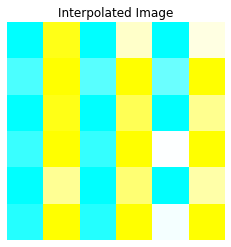

In [8]:
interpolated_image = interpolateBayer(bayerFilter,matrix)
plt.title("Interpolated Image")
plt.imshow(interpolated_image)
plt.axis('off')
plt.show()

In [9]:
def convertToHSV(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image

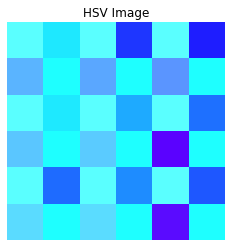

In [10]:
HSV_image = convertToHSV(interpolated_image)
plt.title("HSV Image")
plt.imshow(HSV_image)
plt.axis('off')
plt.show()